作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)

## 导入依赖

In [2]:
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
# GUI界面
import ipywidgets as widgets

# 阿凯机器人工具箱
# - Gemini335类
from kyle_robot_toolbox.camera import Gemini335
# - 色块识别
from kyle_robot_toolbox.opencv import detect_color_block

%matplotlib inline

pybullet build time: Jun  3 2022 02:05:55


## 相机初始化

In [3]:
# 创建相机对象
camera = Gemini335()

## 采集图像

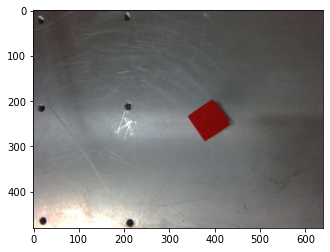

In [5]:
# 采集图像
img_bgr = camera.read_color_img()
# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

## HSV阈值可视化调参

In [6]:
# HSV阈值初始值
hsv_lowerb = [0, 0, 0]
hsv_upperb = [255, 255, 255]

In [7]:
# 将图像转换为HSV空间
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

In [8]:
# H通道 整数范围滑动条
widget_h = widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='H通道:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
# S通道 整数范围滑动条
widget_s = widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='S通道:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
# V通道 整数范围滑动条
widget_v = widgets.IntRangeSlider(
    value=[0, 255],
    min=0,
    max=255,
    step=1,
    description='V通道:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

# 保存配置好的HSV阈值
def save_range(event):
    global hsv_lowerb, hsv_upperb
    print("保存HSV阈值")
    np.save("config/hsv_range/red_hsv_lowerb.npy", hsv_lowerb)
    np.save("config/hsv_range/red_hsv_upperb.npy", hsv_upperb)
    
save_button = widgets.Button(description="保存HSV阈值")
save_button.on_click(save_range)

# 创建布局
vbox = widgets.VBox([save_button, widget_h, widget_s, widget_v])

<IPython.core.display.Javascript object>


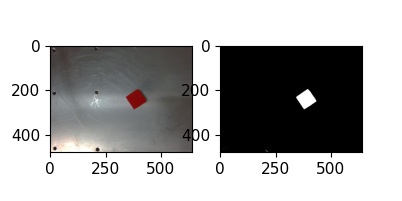

保存HSV阈值


In [9]:
%matplotlib notebook

plt.figure(figsize=(4, 2))

def on_hsv_change(change):
    '''HSV阈值发生改变'''
    global widget_h, widget_s, widget_v
    global hsv_lowerb, hsv_upperb
    min_h, max_h = widget_h.value
    min_s, max_s = widget_s.value
    min_v, max_v = widget_v.value
    # 更新HSV阈值
    hsv_lowerb = [min_h, min_s, min_v]
    hsv_upperb = [max_h, max_s, max_v]
    # print(f"HSV Lowerb: {hsv_lowerb}")
    # print(f"HSV Upperb: {hsv_upperb}")
    # 二值化
    mask = cv2.inRange(img_hsv, np.uint8(hsv_lowerb), np.uint8(hsv_upperb))
    # 图像显示
    plt.subplot(121)
    plt.imshow(img_bgr[:, :, ::-1])
    plt.subplot(122)
    plt.imshow(mask, cmap="gray")

widget_h.observe(on_hsv_change, names='value')
widget_s.observe(on_hsv_change, names='value')
widget_v.observe(on_hsv_change, names='value')


# 更新一次
on_hsv_change(None)
# 显示GUI组件
vbox

## 检测色块

ROI矩形区域列表: [(341, 196, 95, 94)]


<IPython.core.display.Javascript object>


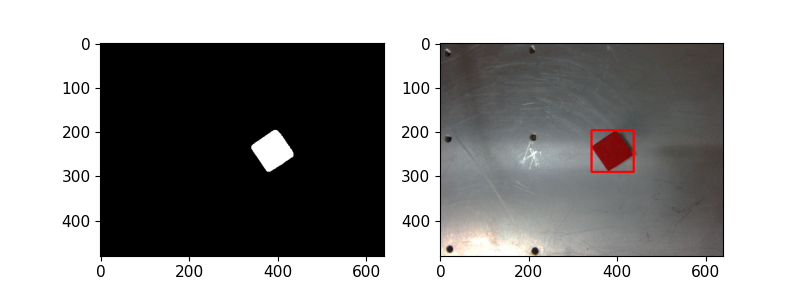

In [10]:
# 检测色块
rect_list, mask, canvas = detect_color_block(img_bgr, hsv_lowerb, hsv_upperb, \
                                            roi_min_size=20, roi_max_size=200)
print(f"ROI矩形区域列表: {rect_list}")
# 图像显示
plt.figure(figsize=(8, 3))
plt.subplot(121)
plt.imshow(mask, cmap="gray")
plt.subplot(122)
plt.imshow(canvas[:, :, ::-1])  